# Bagging stuff


In [6]:
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()
x=dataset.data
y=dataset.target
from sklearn.model_selection import train_test_split
(xtrain,xtest,ytrain,ytest)=train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LogisticRegression#binary classification k liye hi banayaa gya hai #linear model as like linear regression
model=LogisticRegression()
from sklearn.ensemble import BaggingClassifier#bagging and boosting comes under it mtlv same 
BG=BaggingClassifier(base_estimator=model,n_estimators=100,max_features=10,max_samples=100)
BG.fit(xtrain,ytrain)#logistic regression me epochs nahi nn me hoti haiiiii

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

BaggingClassifier(base_estimator=LogisticRegression(), max_features=10,
                  max_samples=100, n_estimators=100)

In [11]:
ypred_test=BG.predict(xtest)
ypred_train=BG.predict(xtrain)

from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred_test))
print(accuracy_score(ytrain,ypred_train))

0.956140350877193
0.945054945054945


In [10]:
model.fit(xtrain,ytrain)
ypred_test=model.predict(xtest)
ypred_train=model.predict(xtrain)
print(accuracy_score(ytest,ypred_test))
print(accuracy_score(ytrain,ypred_train))

0.9649122807017544
0.9494505494505494


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# K fold cross validation

In [18]:
model=LogisticRegression()
from sklearn.model_selection import cross_val_score
 # MODEL_SELECTION : model choose best one with the help of acuracy and all...
score=cross_val_score(model,x,y,cv=5)
score.mean()
# array([0.92982456, 0.93859649, 0.96491228, 0.93859649, 0.95575221])
# 0.9455364073901569

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.9455364073901569

# Unsupervised Learning k-mean (elbow)

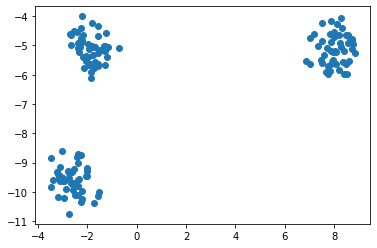

In [34]:
# k=no.of clusters
# wcss:within cluster sum of squares
# ireis dataset 3 haiii-can't plot because of four dimentions
# mean se kitna dur hai is standard deviation

# ELBOW POINT FINDING REPRESENTATION

from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5)
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])

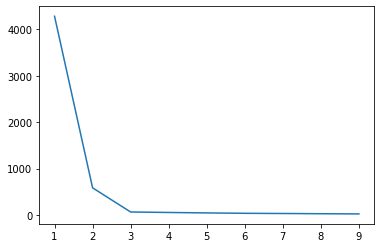

In [42]:
from sklearn.cluster import KMeans
# sari clustering algorithms cluster package ke andar hiiiiii
wcss=[]
K=[1,2,3,4,5,6,7,8,9]
for i in K:
  km=KMeans(n_clusters=i)
  km.fit(x)
  wcss.append(km.inertia_)
# wcss
plt.plot(K,wcss)

In [44]:
km=KMeans(n_clusters=3)
ypred=km.fit_predict(x)
ypred

array([1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2,
       0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2,
       1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1], dtype=int32)

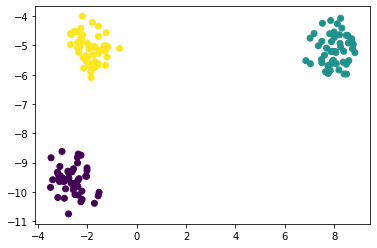

In [45]:
plt.scatter(x[:,0],x[:,1],c=ypred)